### (2) Geo-structural modeling

This notebook contains all the steps to create the 3D Geo-structural model of the New Jersey shelf. It is based on the open-source modeling package GemPy. Two types of input data were used for constraining the model. Surface points and orientations. Surface points are based on picking seismic horizons in Petrel, orientations were manually added. Seven prominent sequences are modelled. 

In [1]:
# Import dependencies
import gempy as gp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

pd.set_option('precision', 2)

No module named 'osgeo'


In [2]:
# Create model object
geo_model = gp.create_model('Geo-structural model NJ shelf')

In [3]:
# Initialize data, extent and resolution
geo_model = gp.init_data(geo_model, [0, 69000, 0, 134000, -1700, 0], [138,268,85], 
                        path_i="Data/Geo-structural model/SurfacePoints.csv",
                        path_o="Data/Geo-structural model/Orientations.csv")

Active grids: ['regular']


In [4]:
# Order surfaces (Stratigraphic pile (top to bottom))
gp.map_stack_to_surfaces(geo_model,{"SF_series": ('SeaFloor'),
                                    "m1_series": ('m1'),
                                    "m4_1_series": ('m4_1'),
                                    "m5_series": ('m5'),
                                    "m5_4_series": ('m5_4'),
                                    "m5_8_series": ('m5_8'),
                                    "m6_series": ('m6'),
                                    "o1_series": ('o1'),
                                    "base_series": ('basement')})

,surface,series,order_surfaces,color,id
0,SeaFloor,SF_series,1,#015482,1
1,m1,m1_series,1,#9f0052,2
2,m4_1,m4_1_series,1,#ffbe00,3
3,m5,m5_series,1,#728f02,4
4,m5_4,m5_4_series,1,#443988,5
5,m5_8,m5_8_series,1,#ff3f20,6
6,m6,m6_series,1,#5DA629,7
7,o1,o1_series,1,#4878d0,8
8,basement,base_series,1,#ee854a,9


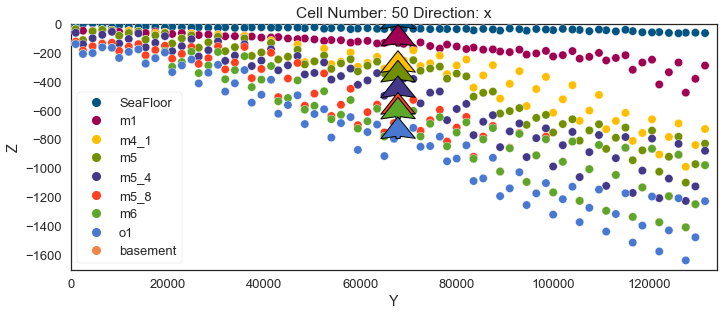

In [5]:
# Input data cross section along dip direction
gp.plot_2d(geo_model, cell_number=[50],
           direction=['x'], show_data=True, ve=30)

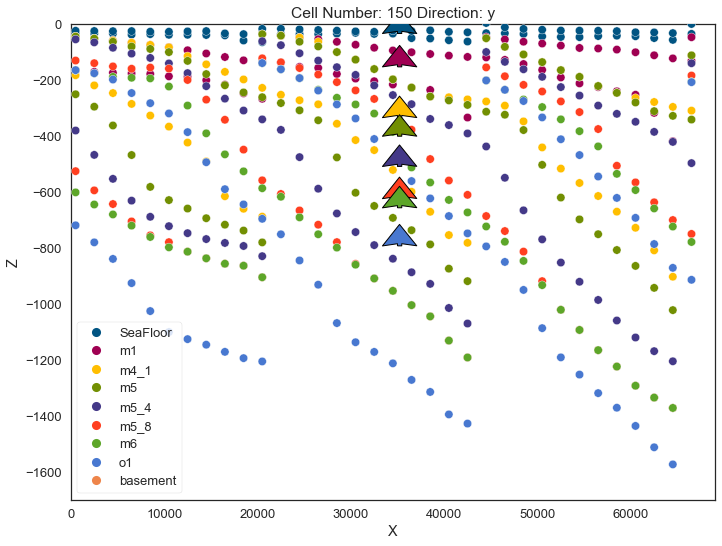

In [6]:
# Input data cross section along strike direction
gp.plot_2d(geo_model, cell_number=[150],
           direction=['y'], show_data=True, ve=30)

In [7]:
%%time
# Set interpolator
interp_data = gp.set_interpolator(geo_model, theano_optimizer='fast_run',compile_theano=True)

Setting kriging parameters to their default values.
Compiling theano function...
Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                                       values
range                                1.5e+05
$C_o$                                5.4e+08
drift equations  [3, 3, 3, 3, 3, 3, 3, 3, 3]
Wall time: 15.3 s


In [8]:
%%time
# Compute model solution
sol=gp.compute_model(geo_model,compute_mesh=True)

Wall time: 6min 40s


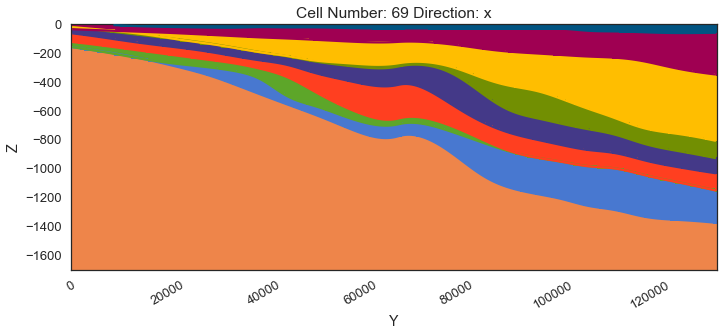

In [9]:
# Model cross section along dip direction
gp.plot_2d(geo_model, direction="x", cell_number=69, ve=30, show_data=False, show_lith=True)

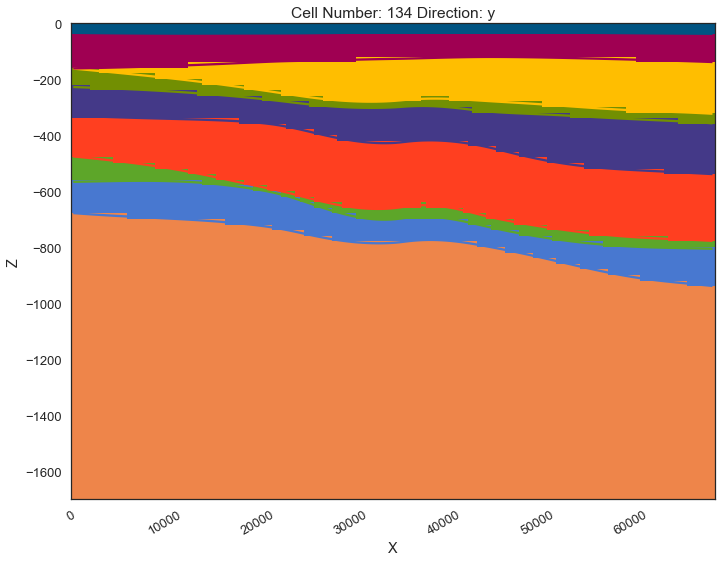

In [10]:
# Model cross section along strike direction
gp.plot_2d(geo_model, direction="y", cell_number=134, ve=30, show_data=False, show_lith=True)

In [11]:
# Model in full 3D view
gpv = gp.plot_3d(geo_model, ve=30, plotter_type='background', show_data=False)
gpv.p.camera_position = (320, 200,3)

In [12]:
# Save result to zipped folder (contains all relevant files to directly recompute model)
gp.save_model(geo_model)

True